In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv('UWRL_river_velocimetry_dataset.csv')
df = pd.read_csv('UWRL_river_velocimetry_dataset_NEW.csv')

In [3]:
df['v_pos'] =  [0 if pd.isna(x) else (-1 if x < 0 else 1) for x in df['v_x']]
df.datetime = pd.to_datetime(df.datetime)
print(df.columns)
df

Index(['datetime', 'x', 'y', 'v_x', 'v_y', 'velocity', 's2n', 'corr',
       'sun_altitude', 'sun_azimuth', 'spacial_location', 'LRO_discharge',
       'LRO_discharge_site', 'turbidity', 'vegetation', 'visibility',
       'cloudcover', 'solarradiation', 'uvindex', 'conditions', 'angle',
       'v_pos'],
      dtype='object')


,datetime,x,y,v_x,v_y,velocity,s2n,corr,sun_altitude,sun_azimuth,...,LRO_discharge_site,turbidity,vegetation,visibility,cloudcover,solarradiation,uvindex,conditions,angle,v_pos
0,2024-04-10 13:38:23,0.155,9.645,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,0
1,2024-04-10 13:38:23,0.285,9.645,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,0
2,2024-04-10 13:38:23,0.415,9.645,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,0
3,2024-04-10 13:38:23,0.545,9.645,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,0
4,2024-04-10 13:38:23,0.675,9.645,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999996,2024-04-16 06:48:12,10.815,2.495,0.249444,0.027593,0.250966,2.11600,0.35096,0.191231,1.495261,...,WaterLab,19.30,none,9.9,50.7,7,0,Partially cloudy,0.110168,1
8999997,2024-04-16 06:48:12,10.945,2.495,0.488962,0.196981,0.527149,1.96440,0.34064,0.191231,1.495261,...,WaterLab,19.30,none,9.9,50.7,7,0,Partially cloudy,0.382966,1
8999998,2024-04-16 06:48:12,11.075,2.495,0.198783,0.153478,0.251138,1.97728,0.31744,0.191231,1.495261,...,WaterLab,19.30,none,9.9,50.7,7,0,Partially cloudy,0.657490,1
8999999,2024-04-16 06:48:12,11.205,2.495,0.444174,0.226174,0.498443,2.04792,0.33272,0.191231,1.495261,...,WaterLab,19.30,none,9.9,50.7,7,0,Partially cloudy,0.470981,1


In [2]:
# df_var = pd.read_csv('UWRL_river_velocimetry_dataset_angle_variance.csv')
df_var = pd.read_csv('UWRL_river_velocimetry_dataset_angle_variance_NEW.csv')

In [3]:
df_var['v_pos'] =  [0 if pd.isna(x) else (-1 if x < 0 else 1) for x in df_var['v_x']]
df_var.datetime = pd.to_datetime(df_var.datetime)
print(df_var.columns)
df_var

Index(['datetime', 'x', 'y', 'v_x', 'v_y', 'velocity', 's2n', 'corr',
       'sun_altitude', 'sun_azimuth', 'spacial_location', 'LRO_discharge',
       'LRO_discharge_site', 'turbidity', 'vegetation', 'visibility',
       'cloudcover', 'solarradiation', 'uvindex', 'conditions', 'angle',
       'angle_var', 'angle_var_support', 'v_pos'],
      dtype='object')


,datetime,x,y,v_x,v_y,velocity,s2n,corr,sun_altitude,sun_azimuth,...,vegetation,visibility,cloudcover,solarradiation,uvindex,conditions,angle,angle_var,angle_var_support,v_pos
0,2024-04-10 13:38:23,0.155,9.645,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,none,9.9,0.0,942,9,Clear,NaN,NaN,NaN,0
1,2024-04-10 13:38:23,0.285,9.645,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,none,9.9,0.0,942,9,Clear,NaN,NaN,NaN,0
2,2024-04-10 13:38:23,0.415,9.645,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,none,9.9,0.0,942,9,Clear,NaN,NaN,NaN,0
3,2024-04-10 13:38:23,0.545,9.645,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,none,9.9,0.0,942,9,Clear,NaN,NaN,NaN,0
4,2024-04-10 13:38:23,0.675,9.645,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,none,9.9,0.0,942,9,Clear,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999996,2024-04-16 06:48:12,10.815,2.495,0.249444,0.027593,0.250966,2.11600,0.35096,0.191231,1.495261,...,none,9.9,50.7,7,0,Partially cloudy,0.110168,0.054703,2.0,1
8999997,2024-04-16 06:48:12,10.945,2.495,0.488962,0.196981,0.527149,1.96440,0.34064,0.191231,1.495261,...,none,9.9,50.7,7,0,Partially cloudy,0.382966,0.081940,2.0,1
8999998,2024-04-16 06:48:12,11.075,2.495,0.198783,0.153478,0.251138,1.97728,0.31744,0.191231,1.495261,...,none,9.9,50.7,7,0,Partially cloudy,0.657490,0.359084,2.0,1
8999999,2024-04-16 06:48:12,11.205,2.495,0.444174,0.226174,0.498443,2.04792,0.33272,0.191231,1.495261,...,none,9.9,50.7,7,0,Partially cloudy,0.470981,0.213799,2.0,1


<Axes: xlabel='conditions', ylabel='Count'>

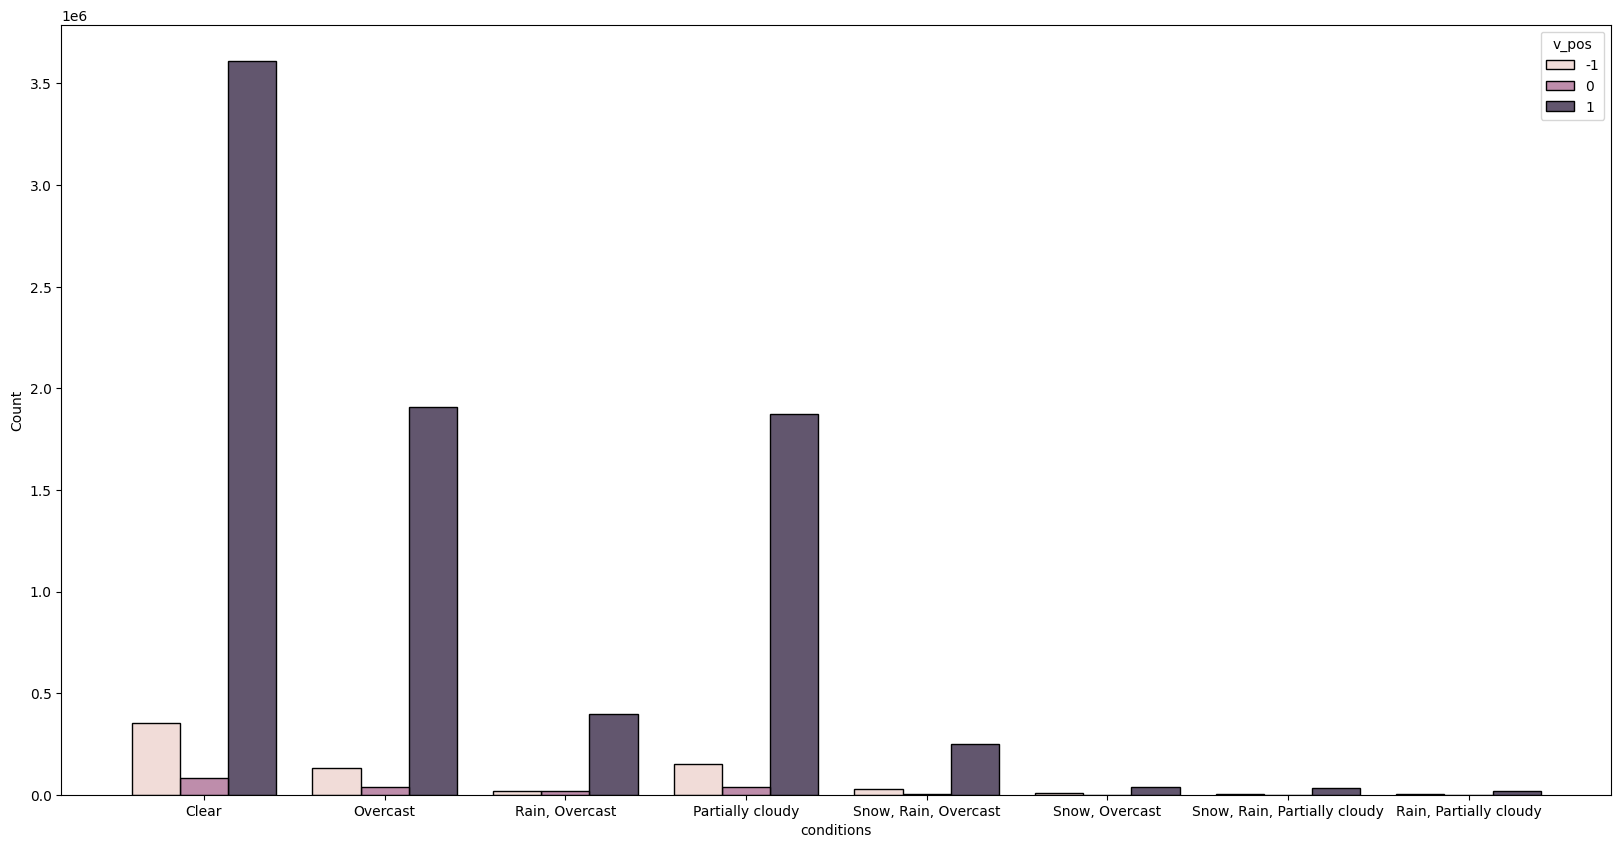

In [4]:
plt.figure(figsize=(20, 10))

sns.histplot(
    data=df,
    x='conditions',
    hue='v_pos',
    discrete=True,
    multiple='dodge',
    shrink=0.8
)

In [5]:
conditions = df.conditions.unique()

for condition in conditions:
    df_temp = df[df.conditions == condition]
    print(condition)
    print(f'     negative: {len(df_temp[df_temp.v_pos == -1]) / len(df_temp):.2%}')
    print(f'          nan: {len(df_temp[df_temp.v_pos == 0]) / len(df_temp):.2%}')
    print(f'  nonnegative: {len(df_temp[df_temp.v_pos == 1]) / len(df_temp):.2%}')

Clear
     negative: 8.71%
          nan: 2.09%
  nonnegative: 89.20%
Overcast
     negative: 6.23%
          nan: 1.82%
  nonnegative: 91.95%
Rain, Overcast
     negative: 4.34%
          nan: 4.40%
  nonnegative: 91.26%
Partially cloudy
     negative: 7.33%
          nan: 1.81%
  nonnegative: 90.85%
Snow, Rain, Overcast
     negative: 9.98%
          nan: 1.82%
  nonnegative: 88.20%
Snow, Overcast
     negative: 13.36%
          nan: 1.82%
  nonnegative: 84.83%
Snow, Rain, Partially cloudy
     negative: 8.51%
          nan: 1.82%
  nonnegative: 89.67%
Rain, Partially cloudy
     negative: 10.77%
          nan: 1.82%
  nonnegative: 87.42%


<Axes: xlabel='cloudcover', ylabel='velocity'>

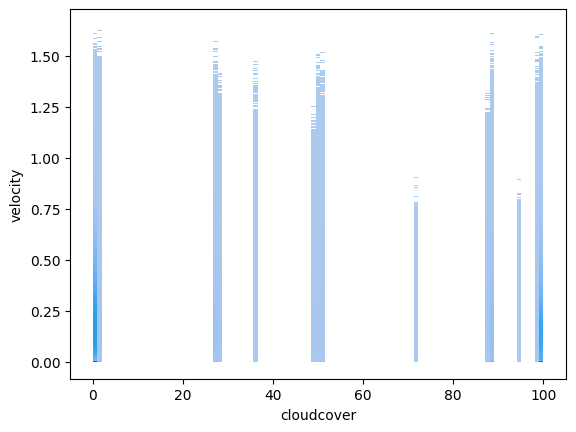

In [6]:
sns.histplot(
    data=df[df.v_x >= 0],
    x='cloudcover',
    y='velocity'
)

<Axes: xlabel='datetime', ylabel='velocity'>

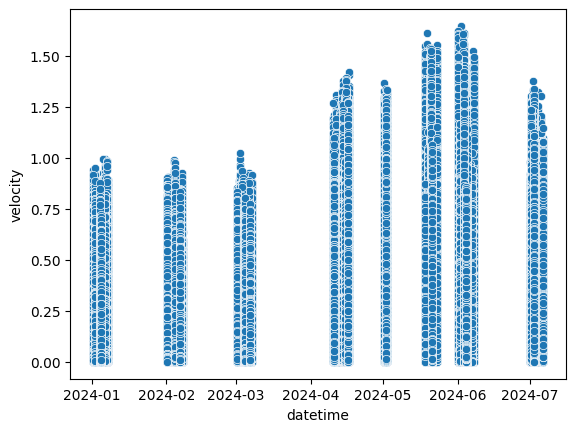

In [7]:
sns.scatterplot(
    data=df,
    x='datetime',
    y='velocity',
)

<Axes: xlabel='v_pos', ylabel='Count'>

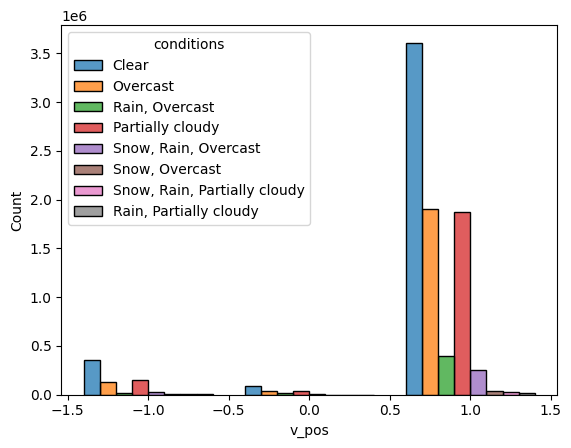

In [8]:
sns.histplot(
    data=df,
    x='v_pos',
    hue='conditions',
    discrete=True,
    shrink=0.8,
    multiple='dodge'
)

<Axes: xlabel='conditions', ylabel='Count'>

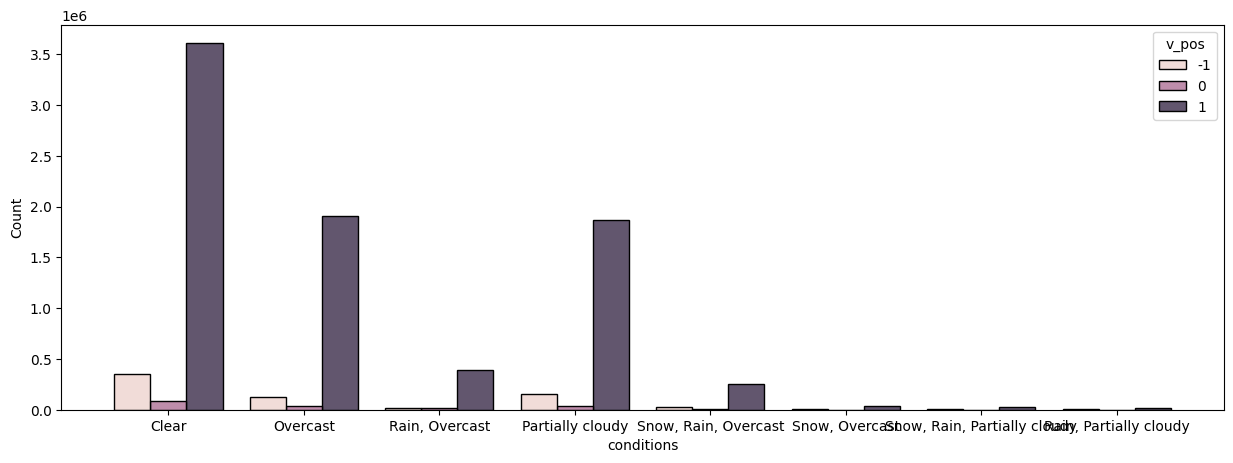

In [9]:
plt.figure(figsize=(15, 5))

sns.histplot(
    data=df,
    x='conditions',
    hue='v_pos',
    discrete=True,
    shrink=0.8,
    multiple='dodge'
)

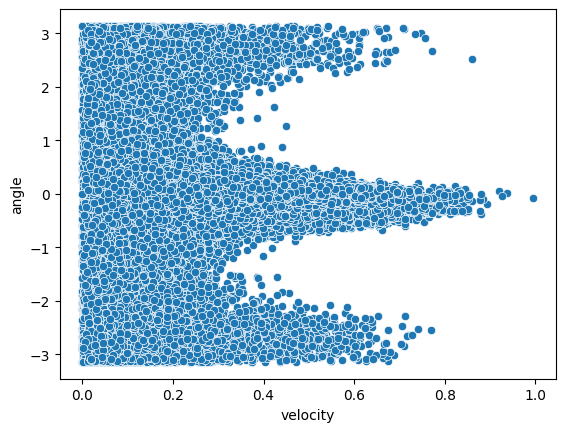

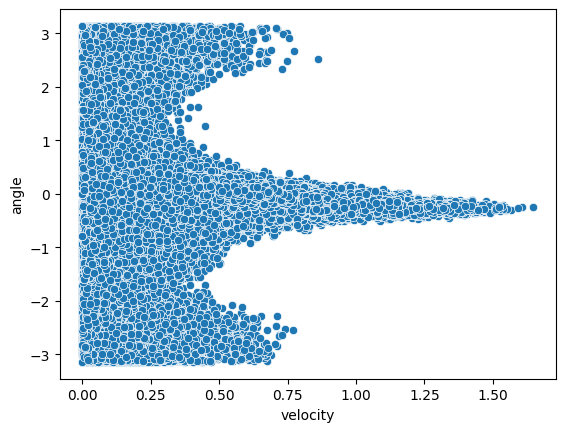

In [4]:
df2 = df_var[(df_var.conditions == 'Snow, Rain, Overcast')|(df_var.conditions == 'Snow, Overcast')|(df_var.conditions == 'Snow, Rain, Partially cloudy')]

sns.scatterplot(
    data=df2,
    x='velocity',
    y='angle'
)
plt.show()
plt.close()

df3 = df_var[df_var.cloudcover == 100]

sns.scatterplot(
    data=df3,
    x='velocity',
    y='angle'
)
plt.show()
plt.close()